In [80]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [82]:
df=pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df=df.drop("region",axis=1)
df["sex"]=df["sex"].map({"male":1,"female":0})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [84]:
df.shape

(1338, 6)

In [85]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0


In [86]:
X=df.drop("charges",axis=1)
Y= df["charges"]
print(X,Y)

      age  sex     bmi  children  smoker
0      19    0  27.900         0       1
1      18    1  33.770         1       0
2      28    1  33.000         3       0
3      33    1  22.705         0       0
4      32    1  28.880         0       0
...   ...  ...     ...       ...     ...
1333   50    1  30.970         3       0
1334   18    0  31.920         0       0
1335   18    0  36.850         0       0
1336   21    0  25.800         0       0
1337   61    0  29.070         0       1

[1338 rows x 5 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print(X_train.shape,X_test.shape)

(936, 5) (402, 5)


In [88]:
models=[LinearRegression(),Lasso(), XGBRegressor(),RandomForestRegressor()]


In [89]:
def compare_models():

  for model in models:
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print(f"R2 for {model.__class__.__name__} is  ", r2_score(Y_test, Y_pred))
    print("----------"*40)

    plt.figure(figsize=(6, 6))
    plt.scatter(Y_test, Y_pred, color='skyblue', edgecolors='black')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # perfect prediction line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model.__class__.__name__}\nActual vs Predicted (R² = {r2_score(Y_test, Y_pred):.2f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


R2 for LinearRegression is   0.7389093130276878
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


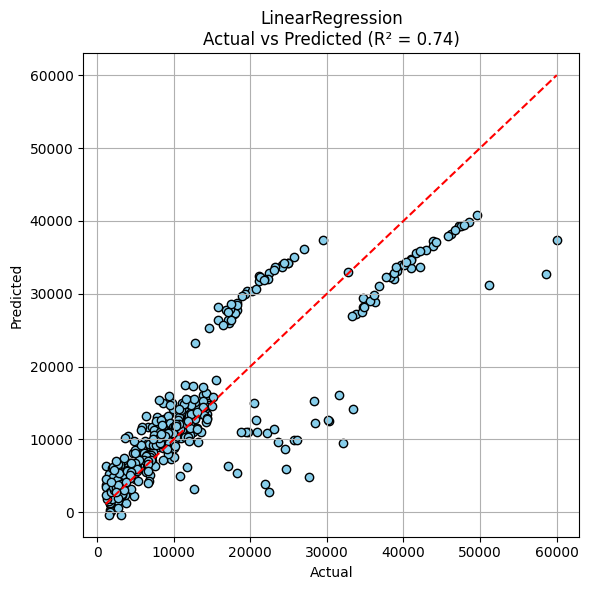

R2 for Lasso is   0.7389188195759417
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


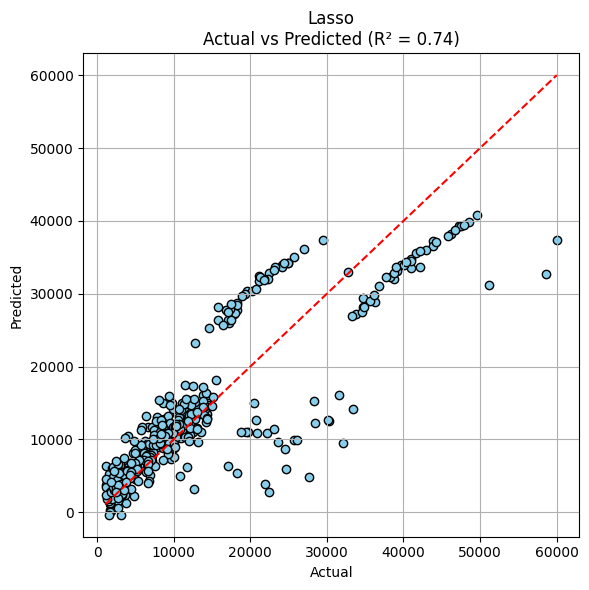

R2 for XGBRegressor is   0.8048389865966833
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


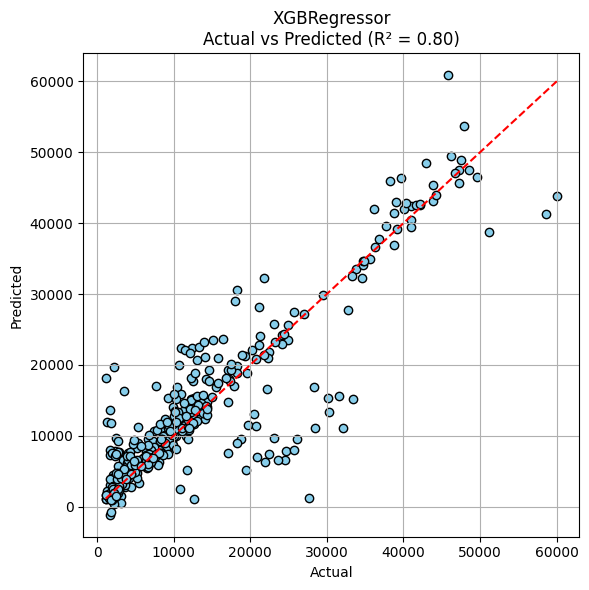

R2 for RandomForestRegressor is   0.8256340109192141
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


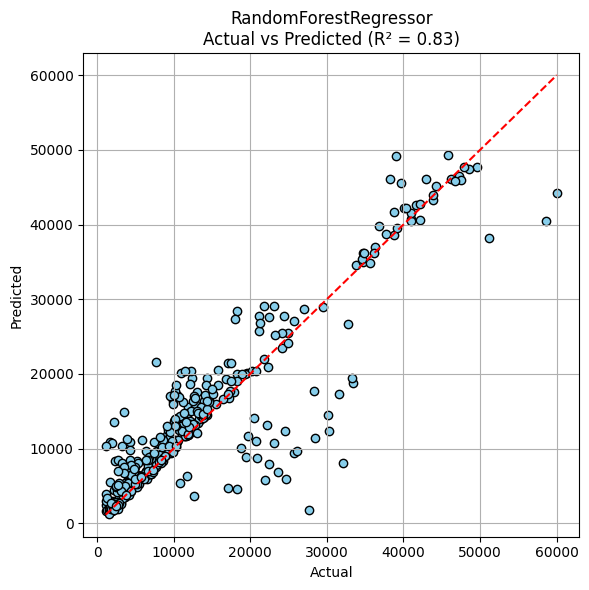

In [90]:
compare_models()

# **Now let's try again with cross validation**

In [91]:
def compare_models_cross_val():
    model_names = []
    mean_scores = []

    for model in models:
      name=model.__class__.__name__
      model_names.append(name)
      scores = cross_val_score(model, X, Y, cv=5)
      avg_score = np.mean(scores)
      mean_scores.append(avg_score)

      print(f"Cross-validation scores for {name}: {np.round(scores,2)}")
      print(f"Average CV score for {model.__class__.__name__}: {np.round(avg_score,2)}")
      print("------------" * 40)

    plt.figure(figsize=(8, 5))
    bars=plt.bar( model_names,mean_scores, color="y")
    plt.bar_label( bars, fmt="%.2f")
    plt.title("Average Cross-Validation R² Scores")
    plt.xlabel("Model")
    plt.ylabel("Average R² Score")


plt.show()


Cross-validation scores for LinearRegression: [0.76 0.71 0.78 0.73 0.76]
Average CV score for LinearRegression: 0.75
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cross-validation scores for Lasso: [0.76 0.71 0.78 0.73 0.76]
Average CV score for Lasso: 0.75
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

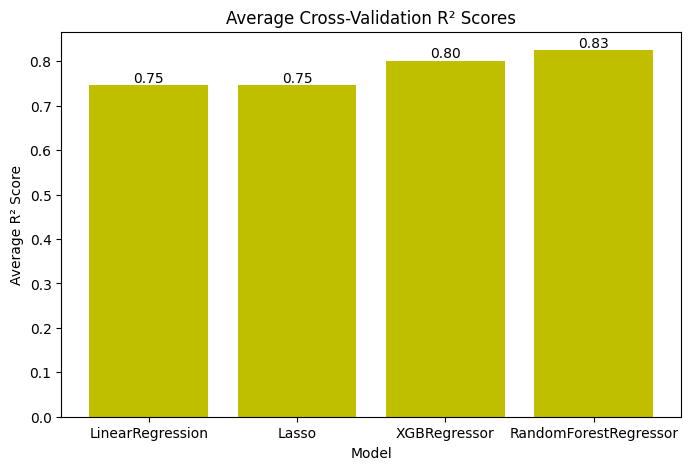

In [92]:
compare_models_cross_val()